In [3]:
import torch
from torchvision import transforms, datasets

In [2]:
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

x = torch.zeros([2, 5])
y = torch.rand([2, 5])

# Changing the shape of the Tensor
y = y.view([1, 10])

In [5]:
# Pass in transformers to the data here
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [7]:
# Using batches of data is more efficient, especially when the dataset
# is huge. Also, passing in batches lets the machine learn more generalizations
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]
print(y)

tensor(0)


In [10]:
import matplotlib.pyplot as plt

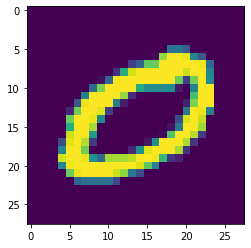

In [15]:
# PyTorch has a different shaping standard. There's a 1x28x28 shaping
# style for an image.

plt.imshow(x.view([28, 28]))
plt.show()

In [ ]:
# Optimizer tries to decrease loss and it doesn't have any idea
# how much better we could get. You want to balance the dataset.

In [19]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
  xs, ys = data
  
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # 3 layers of 64 neurons for our hidden layer
    self.fc1 = nn.Linear(784, 64) # Activation function runs on the output side
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    # Feed forward neural net
    # The activation function is whether or not the neuron is firing
    # Don't wanna run relu on the output layer. Log softmax is a good choice.

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    # Which dimension to apply softmax on? Output is flat, so dim=1
    # It is similar to axes.
    return F.log_softmax(x, dim=1)

net = Net()

In [ ]:
X = torch.rand((28, 28))
# Why is the -1 here? Says that the input is of unknown shape
X = X.view(-1, 28*28)
output = net(X)
print(output)